In [14]:
#!pip install google
#!pip install google-cloud
#!pip install --upgrade protobuf
#!pip install --upgrade requests
#!pip install google-cloud-vision
#!pip install pyasn1-modules
#!pip install google-cloud-automl

  Running setup.py install for google: started
    Running setup.py install for google: finished with status 'done'


You are using pip version 19.0.3, however version 19.2.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 19.0.3, however version 19.2.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 19.0.3, however version 19.2.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 19.0.3, however version 19.2.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


  Running setup.py install for googleapis-common-protos: started
    Running setup.py install for googleapis-common-protos: finished with status 'done'


You are using pip version 19.0.3, however version 19.2.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 19.0.3, however version 19.2.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [15]:
from IPython.display import HTML

# HTML('''<script> $('div.input').hide()''')


<html> <head> </head> <body> <img src="./jupyter/zeb_logo.png" width="100"> </body> </html>

## zeb.Digitale Auftragsverarbeitung


### Auswahl Antrag und Dokumente


In [1]:
from app.widget.widget import open_applications, documents_list

dropdownA, applications = open_applications()
dropdownB, uploaded = documents_list()


Bitte wähle einen offenen Antrag aus:


Dropdown(description='Antrag:', options=(('Blanko - Ursula Müller', 'Blanko'), ('Dinglich - Ursula Müller', 'D…

Bitte wähle ein Szenario aus:


Dropdown(description='Dokumente:', options=(("Blanko - Fehlerhaft - ['1.jpg', '2.jpg', '3.jpg', '4.jpg']", 0),…

In [2]:
import json

print(dropdownA)
print(json.dumps(applications, indent=2))

Dropdown(description='Antrag:', index=1, options=(('Blanko - Ursula Müller', 'Blanko'), ('Dinglich - Ursula Müller', 'Dinglich')), value='Dinglich')
{
  "Blanko": {
    "Applicant": {
      "Name": "Ursula M\u00fcller",
      "Strasse": "Hinterm Mond 13",
      "PLZ": "20095",
      "Geburtsdatum": "23.05.1973"
    },
    "Product": {
      "Name": "Annuit\u00e4tendarlehen",
      "Darlehensh\u00f6he": "30000",
      "Zinssatz": "3,042",
      "Laufzeit": "36",
      "Rate": "872,44",
      "Gesamtbetrag": "31407,71"
    }
  },
  "Dinglich": {
    "Applicant": {
      "Name": "Ursula M\u00fcller",
      "Strasse": "Hinterm Mond 13",
      "PLZ": "20095",
      "Geburtsdatum": "23.05.1973"
    },
    "Product": {
      "Name": "Annuit\u00e4tendarlehen",
      "Darlehensh\u00f6he": "300000",
      "Zinssatz": "3,042",
      "Laufzeit": "420",
      "Rate": "1154,55",
      "Gesamtbetrag": "484911,24"
    },
    "Collateral": {
      "Wert": "325000"
    }
  }
}


### Übermittelte Unterlagen


Folgender Antrag wurde übermittelt:


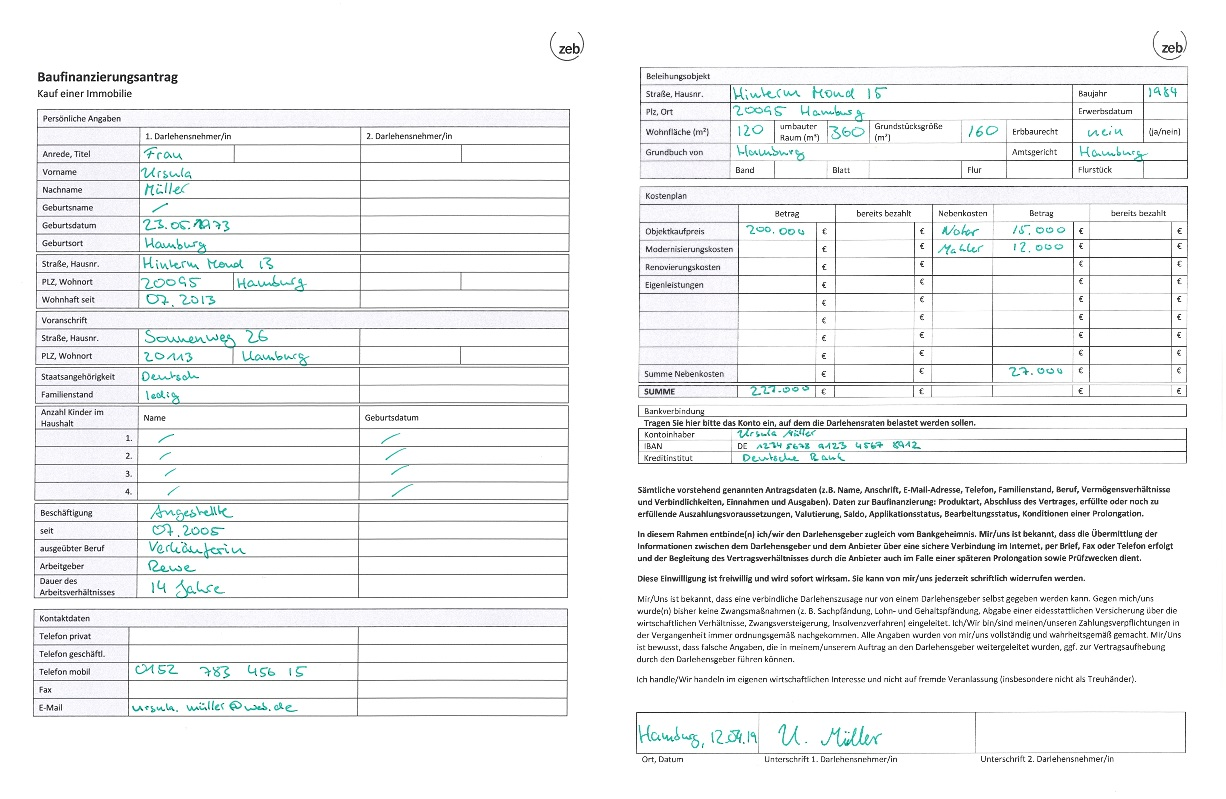


Folgende Dokumente wurden übermittelt:


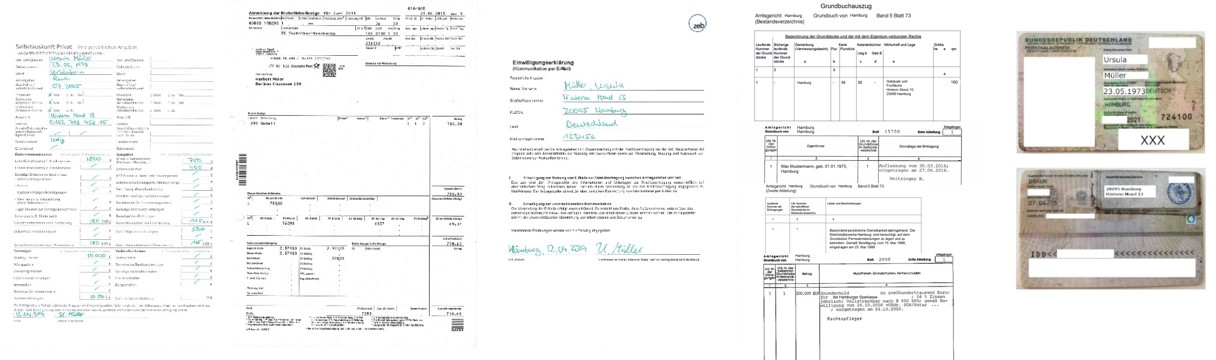

In [3]:
from app.inform.applicant import show_application, show_documents

application = dropdownA.value
documents = dropdownB.value

show_application(application)
show_documents(documents)


In [4]:
from app.decide.document import map_to_application
from app.extract.information import extract_info

application = dropdownA.value
files = dropdownB.value

# application = applications[product]
file_list = uploaded[files]

extracted_info = extract_info(file_list)

required, missing = map_to_application(extracted_info, application)

# print(extracted_info)


IndexError: list index out of range

### Fachlich - Vollständigkeit der Dokumente


In [ ]:
from app.inform.applicant import doc_checklist, show_ampel

complete = doc_checklist(extracted_info, missing)

show_ampel(1 if complete else 3)


### Inhaltlich - Vollständigkeit der Datenfelder


In [ ]:
from app.inform.applicant import show_information, show_ampel

complete = show_information(extracted_info, application)

show_ampel(1 if complete else 3)


### Inhaltlich - Prüfung der Informationen auf Konsistenz und gegen antragsunabhängige Kriterien


In [ ]:
from app.decide.information import plausible
from app.inform.applicant import show_ampel

complete = plausible(extracted_info)

show_ampel(1 if complete else 3)


### Inhaltlich - Abgleich der Unterschrift


In [ ]:
from app.extract.information import extract_signature
from app.inform.applicant import show_ampel

# Bestimmung einer Unterschriftenposition in Dokument und Vergleich Ähnlichkeit der Unterschriften zwischen den Dokumenten
probability = extract_signature(extracted_info, dropdownA.value, dropdownB.value)

show_ampel(1 if probability > 0.95 else 2 if probability > 0.85 else 3)


### Fachlich - Prüfung antragsspezifischer Kriterien


In [ ]:
from app.decide.information import validate
from app.inform.applicant import show_ampel

complete = validate(application, extracted_info)
show_ampel(1 if complete else 3)


### Details Grundbuchauszug

In [3]:
from IPython.display import HTML, display
from app.extract.information import extract_grundbuchauszug

print("Aufschrift")
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in extract_grundbuchauszug()[0])
       )
))
print("Bestandsverzeichnis")
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in extract_grundbuchauszug()[1])
       )
))
print("Abteilung I (Eigentürmer)")
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in extract_grundbuchauszug()[2])
       )
))
print("Abteilung II (Lasten und Beschränkungen)")
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in extract_grundbuchauszug()[3])
       )
))
print("Abteilung III (Grundpfandrechte)")
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in extract_grundbuchauszug()[4])
       )
))


Aufschrift
[['Amtsgericht', 'Blattnummer', 'Auszugsdatum', 'Band'], ['Hamburg', '73', '29.06.2019', '5']]


TypeError: 'function' object is not subscriptable